**Nombre:** Facundo Sago
# Parte 1
## Enunciado asignado
**Enunciado 5:** dado el archivo de registros de jugadas (eventos) de MemPy,
 mostrar un gráfico con los usuarios que más veces jugaron el juego (independientemente del resultado de la partida).


In [100]:
import pandas as pd
import matplotlib.pyplot as plt

In [101]:
# El dataset es el de ejemplo de la cátedra: https://catedras.linti.unlp.edu.ar/mod/resource/view.php?id=30904
datos_url = "https://raw.githubusercontent.com/chacosago/seminario_python/master/actividad2_teoria_pyplus/datos_de_prueba.csv"
df = pd.read_csv(datos_url)

In [102]:
print(df.columns)

Index(['Tiempo', 'Partida', 'Cantidad total de palabras a adivinar',
       'Nombre de evento', 'Usuarie - nick', 'usuarie -genero',
       'usuarie -edad', 'Estado', 'Palabra', 'nivel'],
      dtype='object')


In [103]:
df.rename(columns={"Usuarie - nick" : "usuario","Nombre de evento" : "nombre_de_evento", "Partida" : "partida"},inplace=True)
df

,Tiempo,partida,Cantidad total de palabras a adivinar,nombre_de_evento,usuario,usuarie -genero,usuarie -edad,Estado,Palabra,nivel
0,1621436490,1,5,inicio_partida,pepe,masculino,22,NaN,NaN,medio
1,1621436491,1,5,intento,pepe,masculino,22,error,CASA,medio
2,1621436492,1,5,intento,pepe,masculino,22,error,CASA,medio
3,1621436493,1,5,intento,pepe,masculino,22,ok,CASA,medio
4,1621436494,1,5,intento,pepe,masculino,22,error,PERRO,medio
...,...,...,...,...,...,...,...,...,...,...
89,1621449118,7,6,intento,flor,femenino,22,ok,MESA,difícil
90,1621449119,7,6,intento,flor,femenino,22,ok,PERRO,difícil
91,1621449120,7,6,intento,flor,femenino,22,ok,GATO,difícil
92,1621449121,7,6,intento,flor,femenino,22,ok,MOCHILA,difícil


In [104]:
df = df[df["nombre_de_evento"] == "inicio_partida"]
df = df[["partida", "usuario",  "nombre_de_evento"]]
df

,partida,usuario,nombre_de_evento
0,1,pepe,inicio_partida
20,2,jose,inicio_partida
33,3,clementina,inicio_partida
46,4,jose,inicio_partida
64,5,clara,inicio_partida
77,6,raul,inicio_partida
86,7,flor,inicio_partida


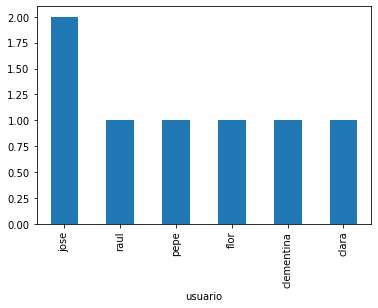

In [105]:
df = df.groupby("usuario")["partida"].count().sort_values(ascending=False).plot(kind="bar")
plt.show()

# Parte 2

## Creterio elegido

Dataset: animes.csv (https://github.com/chacosago/seminario_python/blob/master/actividad2_teoria_pyplus/animes.csv)


Criterio: Animes cuyo puntaje es mayor al promedio.


In [106]:
from wordcloud import WordCloud, STOPWORDS
import numpy as np
from PIL import Image

In [107]:
datos_url = "https://raw.githubusercontent.com/chacosago/seminario_python/master/actividad2_teoria_pyplus/animes.csv"
df = pd.read_csv(datos_url)

In [108]:
df.columns

Index(['anime', 'anime_url', 'anime_img', 'episodes', 'votes', 'weight',
       'rate', 'rate_1', 'rate_2', 'rate_3', 'rate_4', 'rate_5',
       'genre_action', 'genre_adventure', 'genre_comedy', 'genre_drama',
       'genre_family', 'genre_fantasy', 'genre_food', 'genre_harem',
       'genre_historical', 'genre_horror', 'genre_idols', 'genre_isekai',
       'genre_jdrama', 'genre_magical girls', 'genre_martial arts',
       'genre_mecha', 'genre_music', 'genre_mystery', 'genre_post-apocalyptic',
       'genre_romance', 'genre_sci-fi', 'genre_seinen', 'genre_sgdrama',
       'genre_shojo', 'genre_shonen', 'genre_slice of life', 'genre_sports',
       'genre_supernatural', 'genre_thriller'],
      dtype='object')

In [109]:
df = df[["anime", "rate"]]

In [110]:
df.isnull().sum()

anime    0
rate     0
dtype: int64

In [111]:
df.dtypes

anime     object
rate     float64
dtype: object

In [112]:
media = df["rate"].mean()
media

4.08094023904382

In [113]:
df_procesado = df[df["rate"] > media]
df_procesado

,anime,rate
0,Naruto Shippuuden,4.81
1,Shugo Chara,4.86
2,BLEACH,4.83
3,Naruto,4.80
4,Skip Beat!,4.91
...,...,...
1221,Knuspercast,5.00
1222,Magic User's Club,5.00
1223,Steel Fisted Dragon,5.00
1224,VS Knight Lamune & 40 Fire,5.00


In [114]:
palabras = df_procesado["anime"].to_numpy()
palabras[:10]

array(['Naruto Shippuuden', 'Shugo Chara', 'BLEACH', 'Naruto',
       'Skip Beat!', 'REBORN!', 'Gintama',
       "La Corda d'Oro ~primo passo~ and ~secondo passo~", 'Eyeshield 21',
       'Hayate the Combat Butler! (S1 e S2)'], dtype=object)

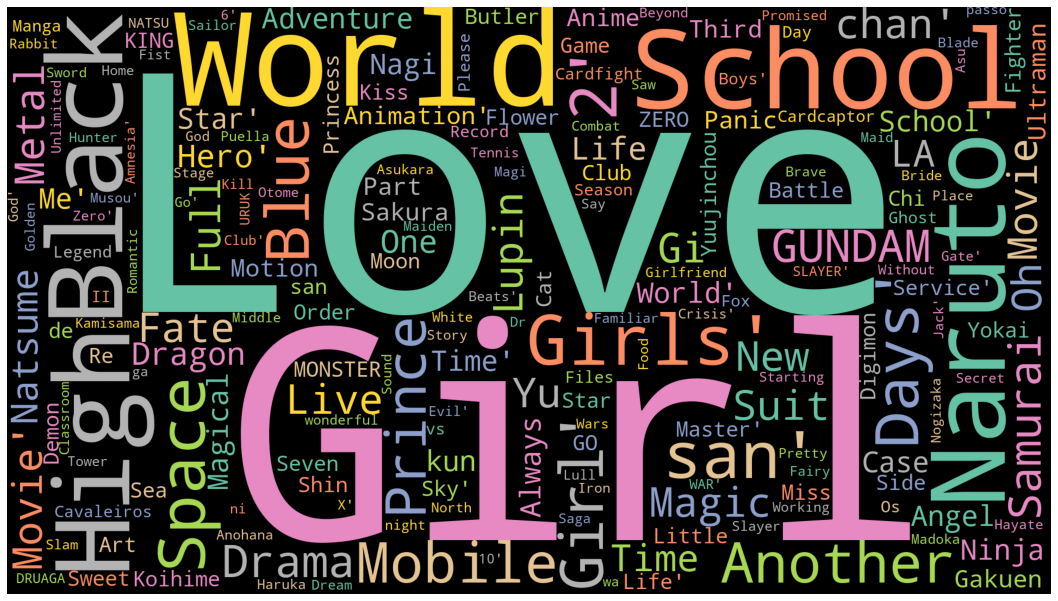

In [118]:
# Tomado de la clase con algunos ajustes:

# Define a function to plot word cloud
def plot_cloud(wordcloud):
    # Set figure size
    plt.figure(figsize=(1920/100, 1080/100))
    # Display image
    plt.imshow(wordcloud)
    # No axis details
    plt.axis("off")
text = str(palabras)
wordcloud = WordCloud(width = 1920, height = 1080, random_state=1, background_color='black',
                         colormap='Set2', collocations=False, stopwords = STOPWORDS).generate(text)
plot_cloud(wordcloud)